In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

fake_dataset1 = pd.read_csv("/content/drive/MyDrive/fake_dataset.csv")
fake_dataset2 = pd.read_csv("/content/drive/MyDrive/fake_dataset2.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_filenames = [fake_dataset1, fake_dataset2]
#all_filenames

In [ ]:
combined_dataset = pd.concat([fake_dataset1, fake_dataset2])
combined_dataset = combined_dataset.rename(columns={'Unnamed: 0':'size'})

In [ ]:
combined_dataset

,size,age,gender,medication,final_hamd_score,ham_q1,ham_q1_w1,ham_q1_w2,ham_q2,ham_q2_w1,ham_q2_w2,ham_q3,ham_q3_w1,ham_q3_w2,ham_q4,ham_q4_w1,ham_q4_w2,ham_q5,ham_q5_w1,ham_q5_w2,ham_q6,ham_q6_w1,ham_q6_w2,ham_q7,ham_q7_w1,ham_q7_w2,ham_q10,ham_q10_w1,ham_q10_w2,ham_q11,ham_q11_w1,ham_q11_w2,ham_q12,ham_q12_w1,ham_q12_w2,ham_q13,ham_q13_w1,ham_q13_w2,ham_q15,ham_q15_w1,ham_q15_w2,hamd_score
0,0,46.0,1,2,12.098774,4,3,0,2,2,2,2,2,2,2,0,4,1,3,2,1,3,1,2,2,0,1,2,1,1,3,1,3,2,3,2,1,2,0,4,0,18
1,1,26.0,1,2,12.098774,3,4,0,4,2,0,1,4,0,2,3,3,3,2,3,2,2,1,3,2,1,2,1,1,1,1,4,3,2,2,1,3,0,4,2,0,15
2,2,57.0,0,2,12.098774,0,2,0,2,2,1,3,3,2,1,3,4,1,4,0,2,4,0,0,3,1,2,3,1,1,4,2,1,3,0,3,2,4,1,3,1,16
3,3,36.0,0,0,11.291633,4,3,1,3,4,2,2,4,1,1,3,4,0,1,4,0,2,4,4,2,3,0,1,0,4,3,3,2,2,2,1,2,0,2,0,0,24
4,4,31.0,0,2,12.098774,0,3,1,1,2,1,1,2,1,3,3,1,2,3,2,1,3,4,3,1,0,3,2,0,3,3,1,4,4,3,4,2,3,2,4,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128,5128,33.0,1,0,17.796067,1,4,1,3,1,1,1,2,0,2,3,1,0,2,1,0,3,2,1,2,1,1,2,2,0,3,0,1,4,1,3,1,4,2,2,1,15
5129,5129,36.0,0,2,15.637726,3,2,0,3,3,2,1,2,3,2,0,4,3,3,3,1,4,4,2,0,3,1,3,1,1,0,0,0,4,2,3,2,4,0,3,4,30
5130,5130,73.0,1,2,15.637726,0,3,4,4,2,1,3,2,1,2,2,4,4,2,1,1,0,3,2,2,2,3,3,0,0,3,4,2,3,3,2,2,0,2,4,4,27
5131,5131,29.0,0,4,19.192029,3,1,1,0,3,1,4,3,1,2,2,1,0,2,3,2,3,3,0,1,3,0,3,1,3,3,0,2,3,1,3,3,2,1,3,4,21


In [ ]:
#assign medication to participants with medicaiton (based on studies); 0 for paroxetine, 1 for nefazodone, 2 for venlafaxine, 3 for fluoxetine, 4 for placebo
#1 = has that medication, 0 = doesn't have it

combined_dataset.loc[combined_dataset['medication']==0, 'paroxetine'] = 1
combined_dataset.loc[combined_dataset['medication']!=0, 'paroxetine'] = 0

combined_dataset.loc[combined_dataset['medication']==1, 'nefazodone'] = 1
combined_dataset.loc[combined_dataset['medication']!=1, 'nefazodone'] = 0

combined_dataset.loc[combined_dataset['medication']==2, 'venlafaxine'] = 1
combined_dataset.loc[combined_dataset['medication']!=2, 'venlafaxine'] = 0

combined_dataset.loc[combined_dataset['medication']==3, 'fluoxetine'] = 1
combined_dataset.loc[combined_dataset['medication']!=3, 'fluoxetine'] = 0

combined_dataset.loc[combined_dataset['medication']==4, 'placebo'] = 1
combined_dataset.loc[combined_dataset['medication']!=4, 'placebo'] = 0

combined_dataset



,size,age,gender,medication,final_hamd_score,ham_q1,ham_q1_w1,ham_q1_w2,ham_q2,ham_q2_w1,ham_q2_w2,ham_q3,ham_q3_w1,ham_q3_w2,ham_q4,ham_q4_w1,ham_q4_w2,ham_q5,ham_q5_w1,ham_q5_w2,ham_q6,ham_q6_w1,ham_q6_w2,ham_q7,ham_q7_w1,ham_q7_w2,ham_q10,ham_q10_w1,ham_q10_w2,ham_q11,ham_q11_w1,ham_q11_w2,ham_q12,ham_q12_w1,ham_q12_w2,ham_q13,ham_q13_w1,ham_q13_w2,ham_q15,ham_q15_w1,ham_q15_w2,hamd_score,paroxetine,nefazodone,venlafaxine,fluoxetine,placebo
0,0,46.0,1,2,12.098774,4,3,0,2,2,2,2,2,2,2,0,4,1,3,2,1,3,1,2,2,0,1,2,1,1,3,1,3,2,3,2,1,2,0,4,0,18,0.0,0.0,1.0,0.0,0.0
1,1,26.0,1,2,12.098774,3,4,0,4,2,0,1,4,0,2,3,3,3,2,3,2,2,1,3,2,1,2,1,1,1,1,4,3,2,2,1,3,0,4,2,0,15,0.0,0.0,1.0,0.0,0.0
2,2,57.0,0,2,12.098774,0,2,0,2,2,1,3,3,2,1,3,4,1,4,0,2,4,0,0,3,1,2,3,1,1,4,2,1,3,0,3,2,4,1,3,1,16,0.0,0.0,1.0,0.0,0.0
3,3,36.0,0,0,11.291633,4,3,1,3,4,2,2,4,1,1,3,4,0,1,4,0,2,4,4,2,3,0,1,0,4,3,3,2,2,2,1,2,0,2,0,0,24,1.0,0.0,0.0,0.0,0.0
4,4,31.0,0,2,12.098774,0,3,1,1,2,1,1,2,1,3,3,1,2,3,2,1,3,4,3,1,0,3,2,0,3,3,1,4,4,3,4,2,3,2,4,2,19,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128,5128,33.0,1,0,17.796067,1,4,1,3,1,1,1,2,0,2,3,1,0,2,1,0,3,2,1,2,1,1,2,2,0,3,0,1,4,1,3,1,4,2,2,1,15,1.0,0.0,0.0,0.0,0.0
5129,5129,36.0,0,2,15.637726,3,2,0,3,3,2,1,2,3,2,0,4,3,3,3,1,4,4,2,0,3,1,3,1,1,0,0,0,4,2,3,2,4,0,3,4,30,0.0,0.0,1.0,0.0,0.0
5130,5130,73.0,1,2,15.637726,0,3,4,4,2,1,3,2,1,2,2,4,4,2,1,1,0,3,2,2,2,3,3,0,0,3,4,2,3,3,2,2,0,2,4,4,27,0.0,0.0,1.0,0.0,0.0
5131,5131,29.0,0,4,19.192029,3,1,1,0,3,1,4,3,1,2,2,1,0,2,3,2,3,3,0,1,3,0,3,1,3,3,0,2,3,1,3,3,2,1,3,4,21,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Use numpy to convert to arrays

#Labels are the values we want to predict
labels = np.array(combined_dataset['final_hamd_score'])

#Remove the labels from the features
#axis 1 refers to the columns
combined_dataset = combined_dataset.drop('final_hamd_score', axis=1)

#Saving feature names for later use
feature_list = list(combined_dataset.columns)

#Convert to numpy array
combined_dataset = np.array(combined_dataset)

In [ ]:
combined_dataset

array([[0.000e+00, 4.600e+01, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.600e+01, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 5.700e+01, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [5.130e+03, 7.300e+01, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [5.131e+03, 2.900e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [5.132e+03, 3.300e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [ ]:
#Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(combined_dataset, labels, test_size = 0.10, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (4791, 46)
Training Labels Shape: (4791,)
Testing Features Shape: (533, 46)
Testing Labels Shape: (533,)


In [ ]:
# # The baseline predictions are the historical averages
# baseline_preds = test_features[:, feature_list.index('average')]
# # Baseline errors, and display average baseline error
# baseline_errors = abs(baseline_preds - test_labels)
# print('Average baseline error: ', round(np.mean(baseline_errors), 2))
# Average baseline error:  5.06 degrees.

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);
#y_pred = rf.predict(train_features)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.15 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.8 %.


In [ ]:
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot

# # Pull out one tree from the forest
# tree = rf.estimators_[5]

# # Export the image to a dot file
# export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# # Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('tree.dot')

# # Write graph to a png file
# graph.write_png('tree.png')

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: medication           Importance: 0.75
Variable: size                 Importance: 0.15
Variable: venlafaxine          Importance: 0.02
Variable: placebo              Importance: 0.02
Variable: age                  Importance: 0.0
Variable: gender               Importance: 0.0
Variable: ham_q1               Importance: 0.0
Variable: ham_q1_w1            Importance: 0.0
Variable: ham_q1_w2            Importance: 0.0
Variable: ham_q2               Importance: 0.0
Variable: ham_q2_w1            Importance: 0.0
Variable: ham_q2_w2            Importance: 0.0
Variable: ham_q3               Importance: 0.0
Variable: ham_q3_w1            Importance: 0.0
Variable: ham_q3_w2            Importance: 0.0
Variable: ham_q4               Importance: 0.0
Variable: ham_q4_w1            Importance: 0.0
Variable: ham_q4_w2            Importance: 0.0
Variable: ham_q5               Importance: 0.0
Variable: ham_q5_w1            Importance: 0.0
Variable: ham_q5_w2            Importance: 0.0
Variable:

In [ ]:
# # Get numerical feature importances
# impmed = list(rf.feature_importances_)

# # List of tuples with variable and importance
# feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# # Sort the feature importances by most important first
# feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# # Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

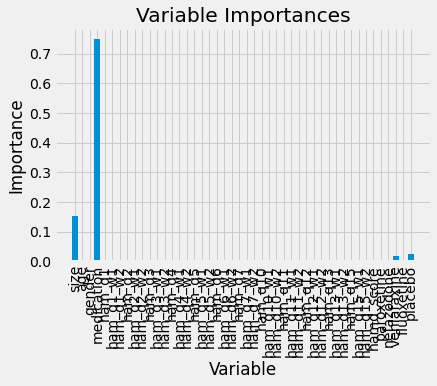

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

No handles with labels found to put in legend.


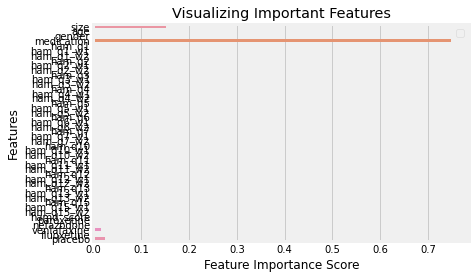

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
x_values = importances
#list(range(len(importances)))
sns.barplot(x=importances, y=feature_list)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# # Use datetime for creating date objects for plotting
# import datetime
# # Dates of training values
# medication = combined_dataset[:, feature_list.index('medication')]

# # Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'medication': medication, 'actual': labels})

# # Dates of predictions
# medication = test_features[:, feature_list.index('medication')]

# # Dataframe with predictions and dates
# predictions_data = pd.DataFrame(medication = {'prediction': predictions})

# # Plot the actual values
# plt.plot(true_data['medication'], true_data['actual'], 'b-', label = 'actual')

# # Plot the predicted values
# plt.plot(predictions_data['medication'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()

# # Graph labels
# plt.xlabel('Medication'); plt.ylabel('Predicted HAM Score'); plt.title('Actual and Predicted Values');

In [ ]:
# # Dates of training values
# med = combined_dataset[:, feature_list.index('medication')]

# # List and then convert to datetime object
# datas = [med for med  in zip(combined_dataset)]

# # Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'medication': datas, 'actual': labels})

# # Dates of predictions
# med = test_features[:, feature_list.index('medication')]

# # Column of dates
# test_meds = [med for med in zip(datas)]

# # Dataframe with predictions and dates
# predictions_data = pd.DataFrame(data = {'medication': test_meds, 'prediction': predictions})

# # Plot the actual values
# plt.plot(true_data['medics'], true_data['actual'], 'b-', label = 'actual')
# # Plot the predicted values
# plt.plot(predictions_data['medics'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()
# # Graph labels
# plt.xlabel('Medics'); plt.ylabel('HAM After?'); plt.title('Actual and Predicted Values');


In [ ]:
# from sklearn.tree import export_graphviz

# # Export as dot file

# export_graphviz(rf, 
#                 out_file='tree.dot', 
#                 feature_names = feature_list,
#                 class_names = labels,
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

In [ ]:
# plt.plot(rf.estimators['accuracy'])
# plt.plot(['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='lower right')
# plt.show()

In [ ]:
# # Create columns of seasons for pair plotting colors
# seasons = []
# for m in combined_dataset[:1]:
#     if m == '0':
#         seasons.append('parox')
#     elif m == '1':
#         seasons.append('nefa')
#     elif m  == '2':
#         seasons.append('ven')
#     elif m == '3':
#         seasons.append('placebo')
# # Will only use six variables for plotting pairs
# reduced_features = combined_dataset[[3, 5]]
# #reduced_combined_dataset['new'] = seasons
# # Use seaborn for pair plots
# import seaborn as sns
# sns.set(style="ticks", color_codes=True);
# # Create a custom color palete
# palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])
# # Make the pair plot with a some aesthetic changes
# sns.pairplot(reduced_features, hue = 'season', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
#                    diag_kws=dict(shade=True))